In [15]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import math
import pandas as pd
from math import exp, floor
import numpy as np
from scipy import stats
from scipy.interpolate import interp1d
import pandas as pd
from random import randint, gauss, random as rand
import xarray as xr
import time

In [2]:
khlr_median=pd.read_csv('../../data/Files/khlr10162020-02142018.csv',parse_dates=['date']).set_index('date')
lthw_median=pd.read_csv('../../data/Files/lthw12162009-10282020.csv',parse_dates=['date']).set_index('date')
uthw_median=pd.read_csv('../../data/Files/uthw01012009-03232021.csv',parse_dates=['date']).set_index('date')

In [3]:
lthw_median['month']=lthw_median.index.month
lthw_median['year']=lthw_median.index.year
uthw_median['month']=uthw_median.index.month
uthw_median['year']=uthw_median.index.year
khlr_median['month']=khlr_median.index.month
khlr_median['year']=khlr_median.index.year

In [105]:
file[36:55]

'2010-05-18-16:00:00'

In [107]:
import datetime

In [110]:
pd.Timestamp(datetime.datetime.strptime(file[36:55], '%Y-%m-%d-%H:%M:%S'))

Timestamp('2010-05-18 16:00:00')

In [112]:
import glob, os

ase_list=[]
time_list=[]
for file in glob.glob("../../data/climate/ar_detections/*landfall_location.nc"):
    ds=xr.load_dataset(file)
    if np.all(ds.sel(longitude=slice(-120,-98))['magnitude'].values==0)==False:
        ase_list.append(file)
        time_list.append(pd.Timestamp(datetime.datetime.strptime(file[36:55], '%Y-%m-%d-%H:%M:%S')))


In [119]:
time_list

[Timestamp('2015-02-03 08:00:00'),
 Timestamp('2019-06-15 14:00:00'),
 Timestamp('2015-05-11 18:00:00'),
 Timestamp('2017-10-24 03:00:00'),
 Timestamp('2019-06-15 23:00:00'),
 Timestamp('2012-08-12 22:00:00'),
 Timestamp('2012-05-31 01:00:00'),
 Timestamp('2013-01-23 11:00:00'),
 Timestamp('2010-03-07 16:00:00'),
 Timestamp('2013-10-17 08:00:00'),
 Timestamp('2014-03-30 08:00:00'),
 Timestamp('2016-10-15 20:00:00'),
 Timestamp('2014-06-27 11:00:00'),
 Timestamp('2010-10-09 04:00:00'),
 Timestamp('2008-07-23 07:00:00'),
 Timestamp('2013-03-25 14:00:00'),
 Timestamp('2014-10-02 14:00:00'),
 Timestamp('2017-03-18 13:00:00'),
 Timestamp('2017-02-17 18:00:00'),
 Timestamp('2012-09-23 14:00:00'),
 Timestamp('2015-02-06 23:00:00'),
 Timestamp('2016-11-15 19:00:00'),
 Timestamp('2019-12-03 11:00:00'),
 Timestamp('2009-03-09 13:00:00'),
 Timestamp('2017-03-27 10:00:00'),
 Timestamp('2014-10-02 23:00:00'),
 Timestamp('2013-03-17 08:00:00'),
 Timestamp('2009-11-23 10:00:00'),
 Timestamp('2011-11-

In [120]:
time_df=pd.DataFrame(time_list)

In [122]:
time_list.sort()

<IPython.core.display.Javascript object>


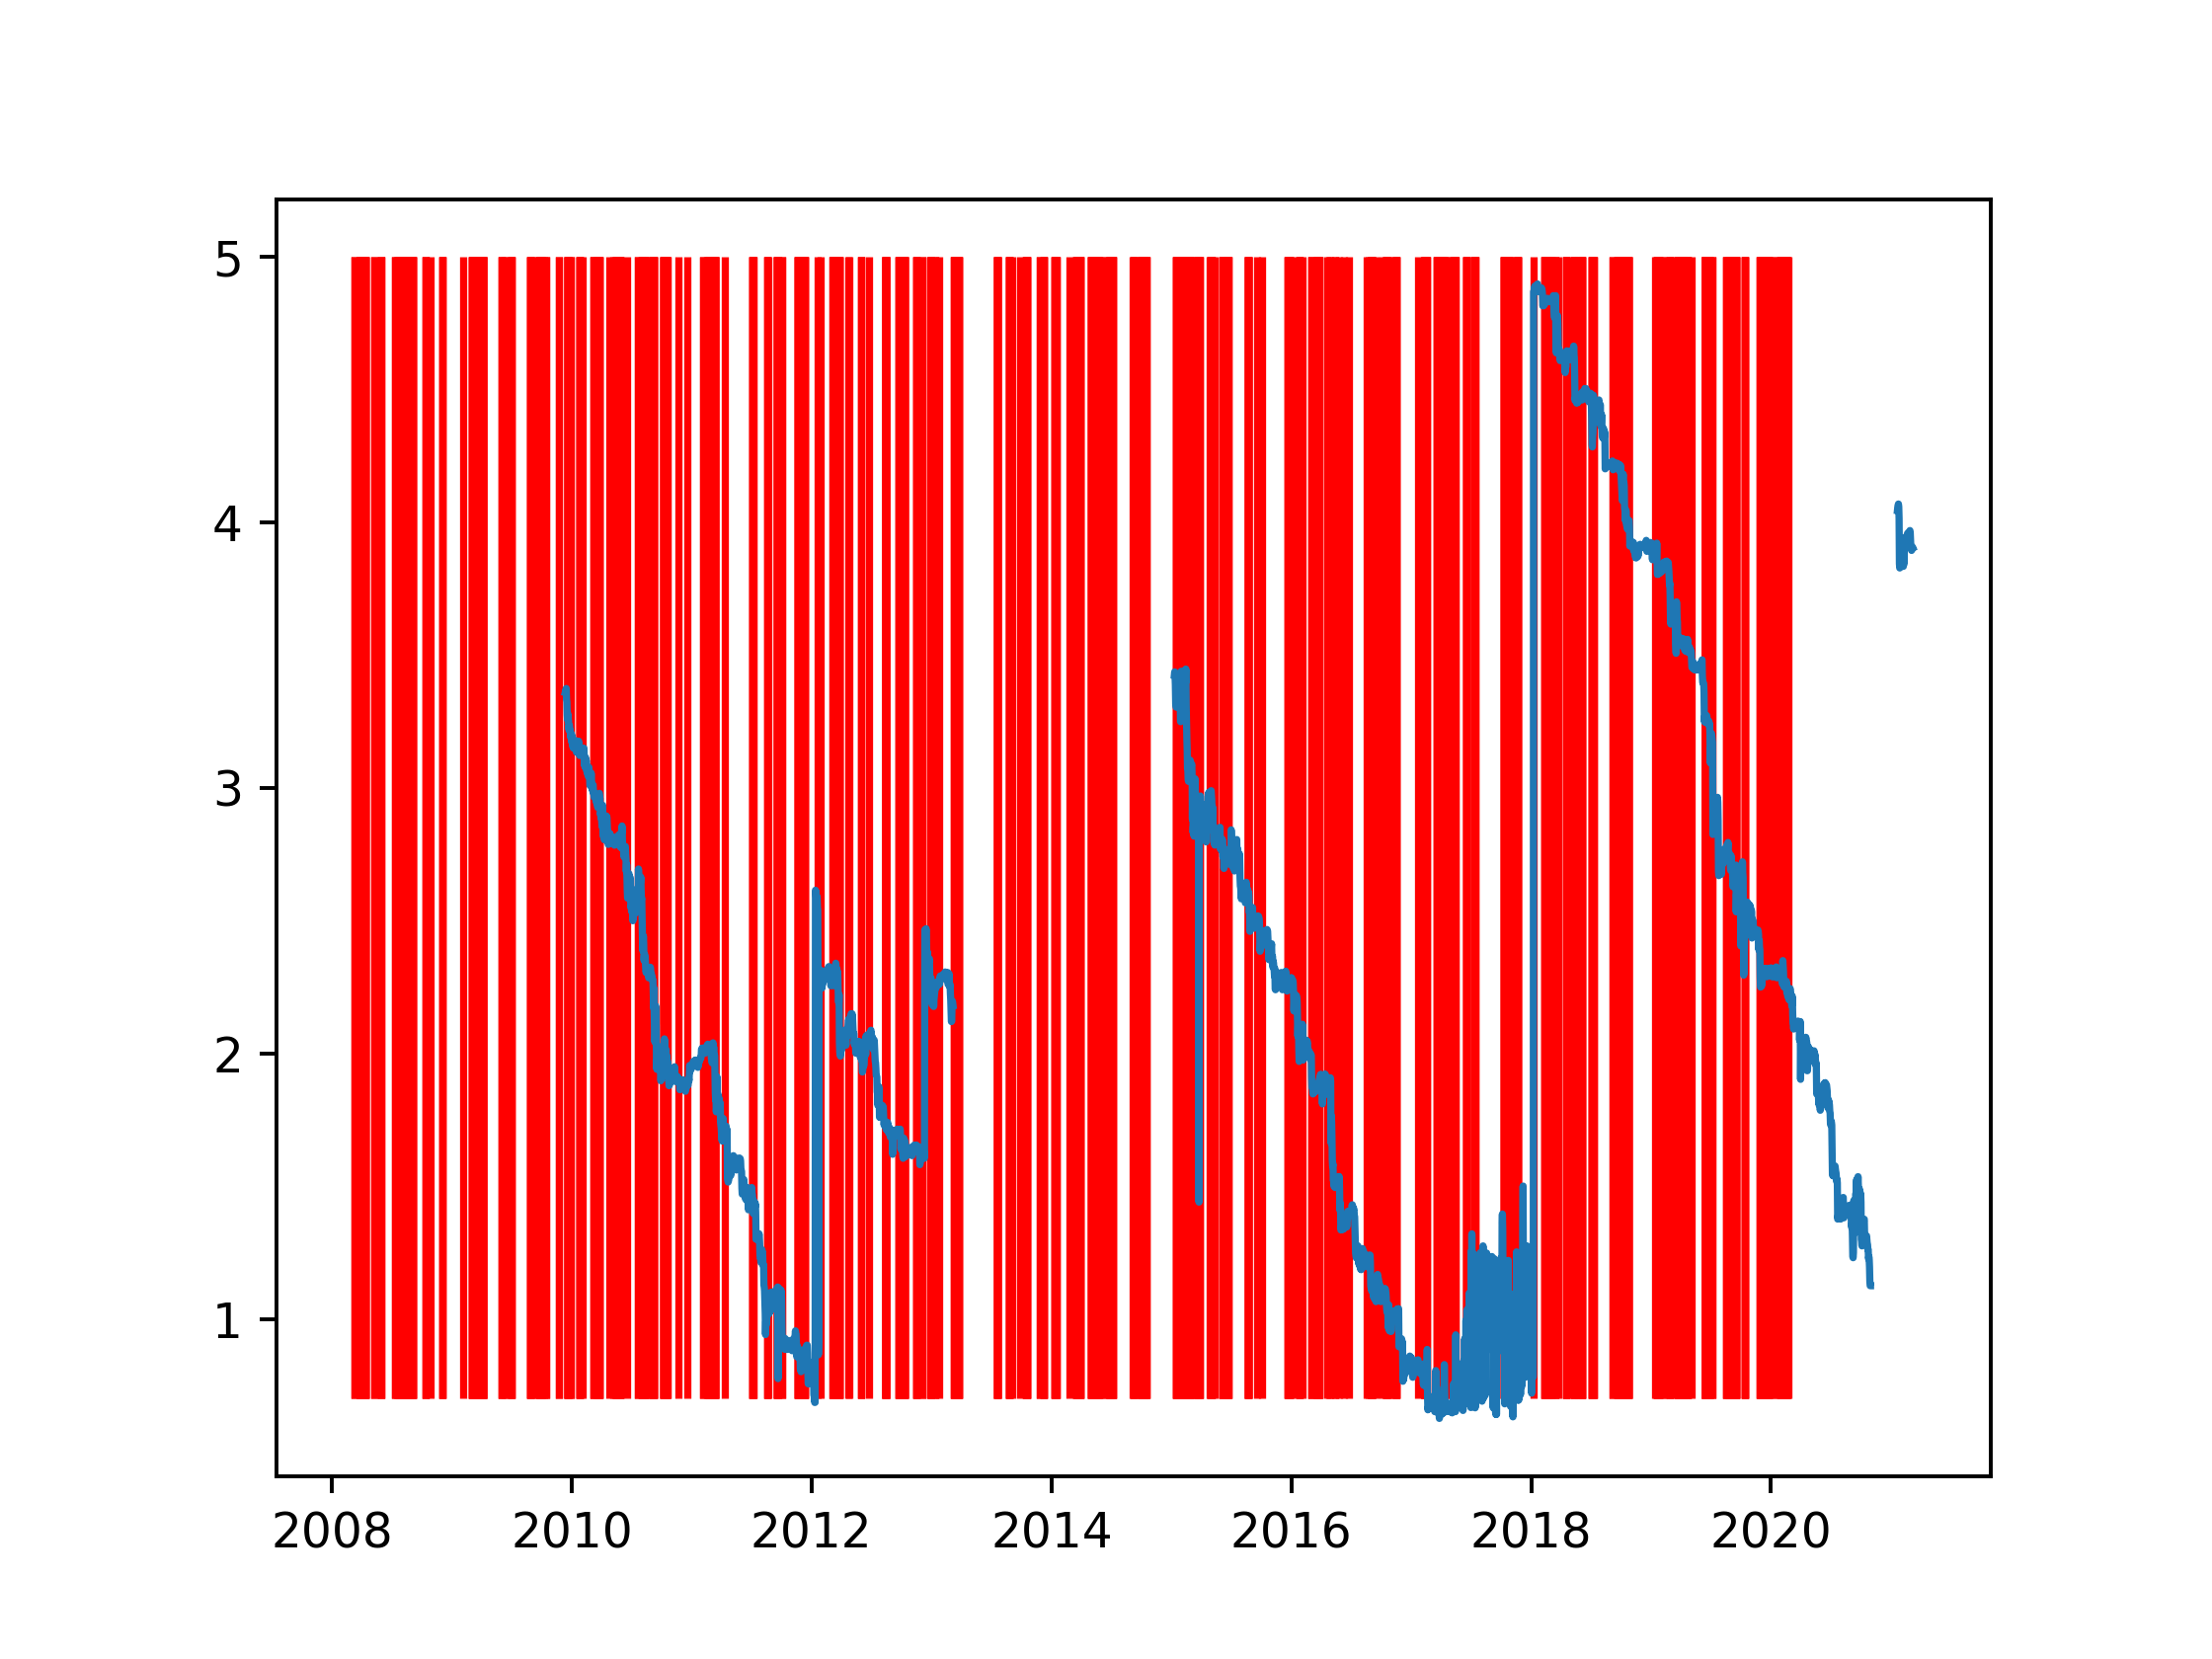

In [123]:
plt.subplots()
plt.plot(lthw_median[' RH(m)'])
plt.vlines(x = time_list,ymin=.7,ymax=5,
           colors = 'red') 

<IPython.core.display.Javascript object>


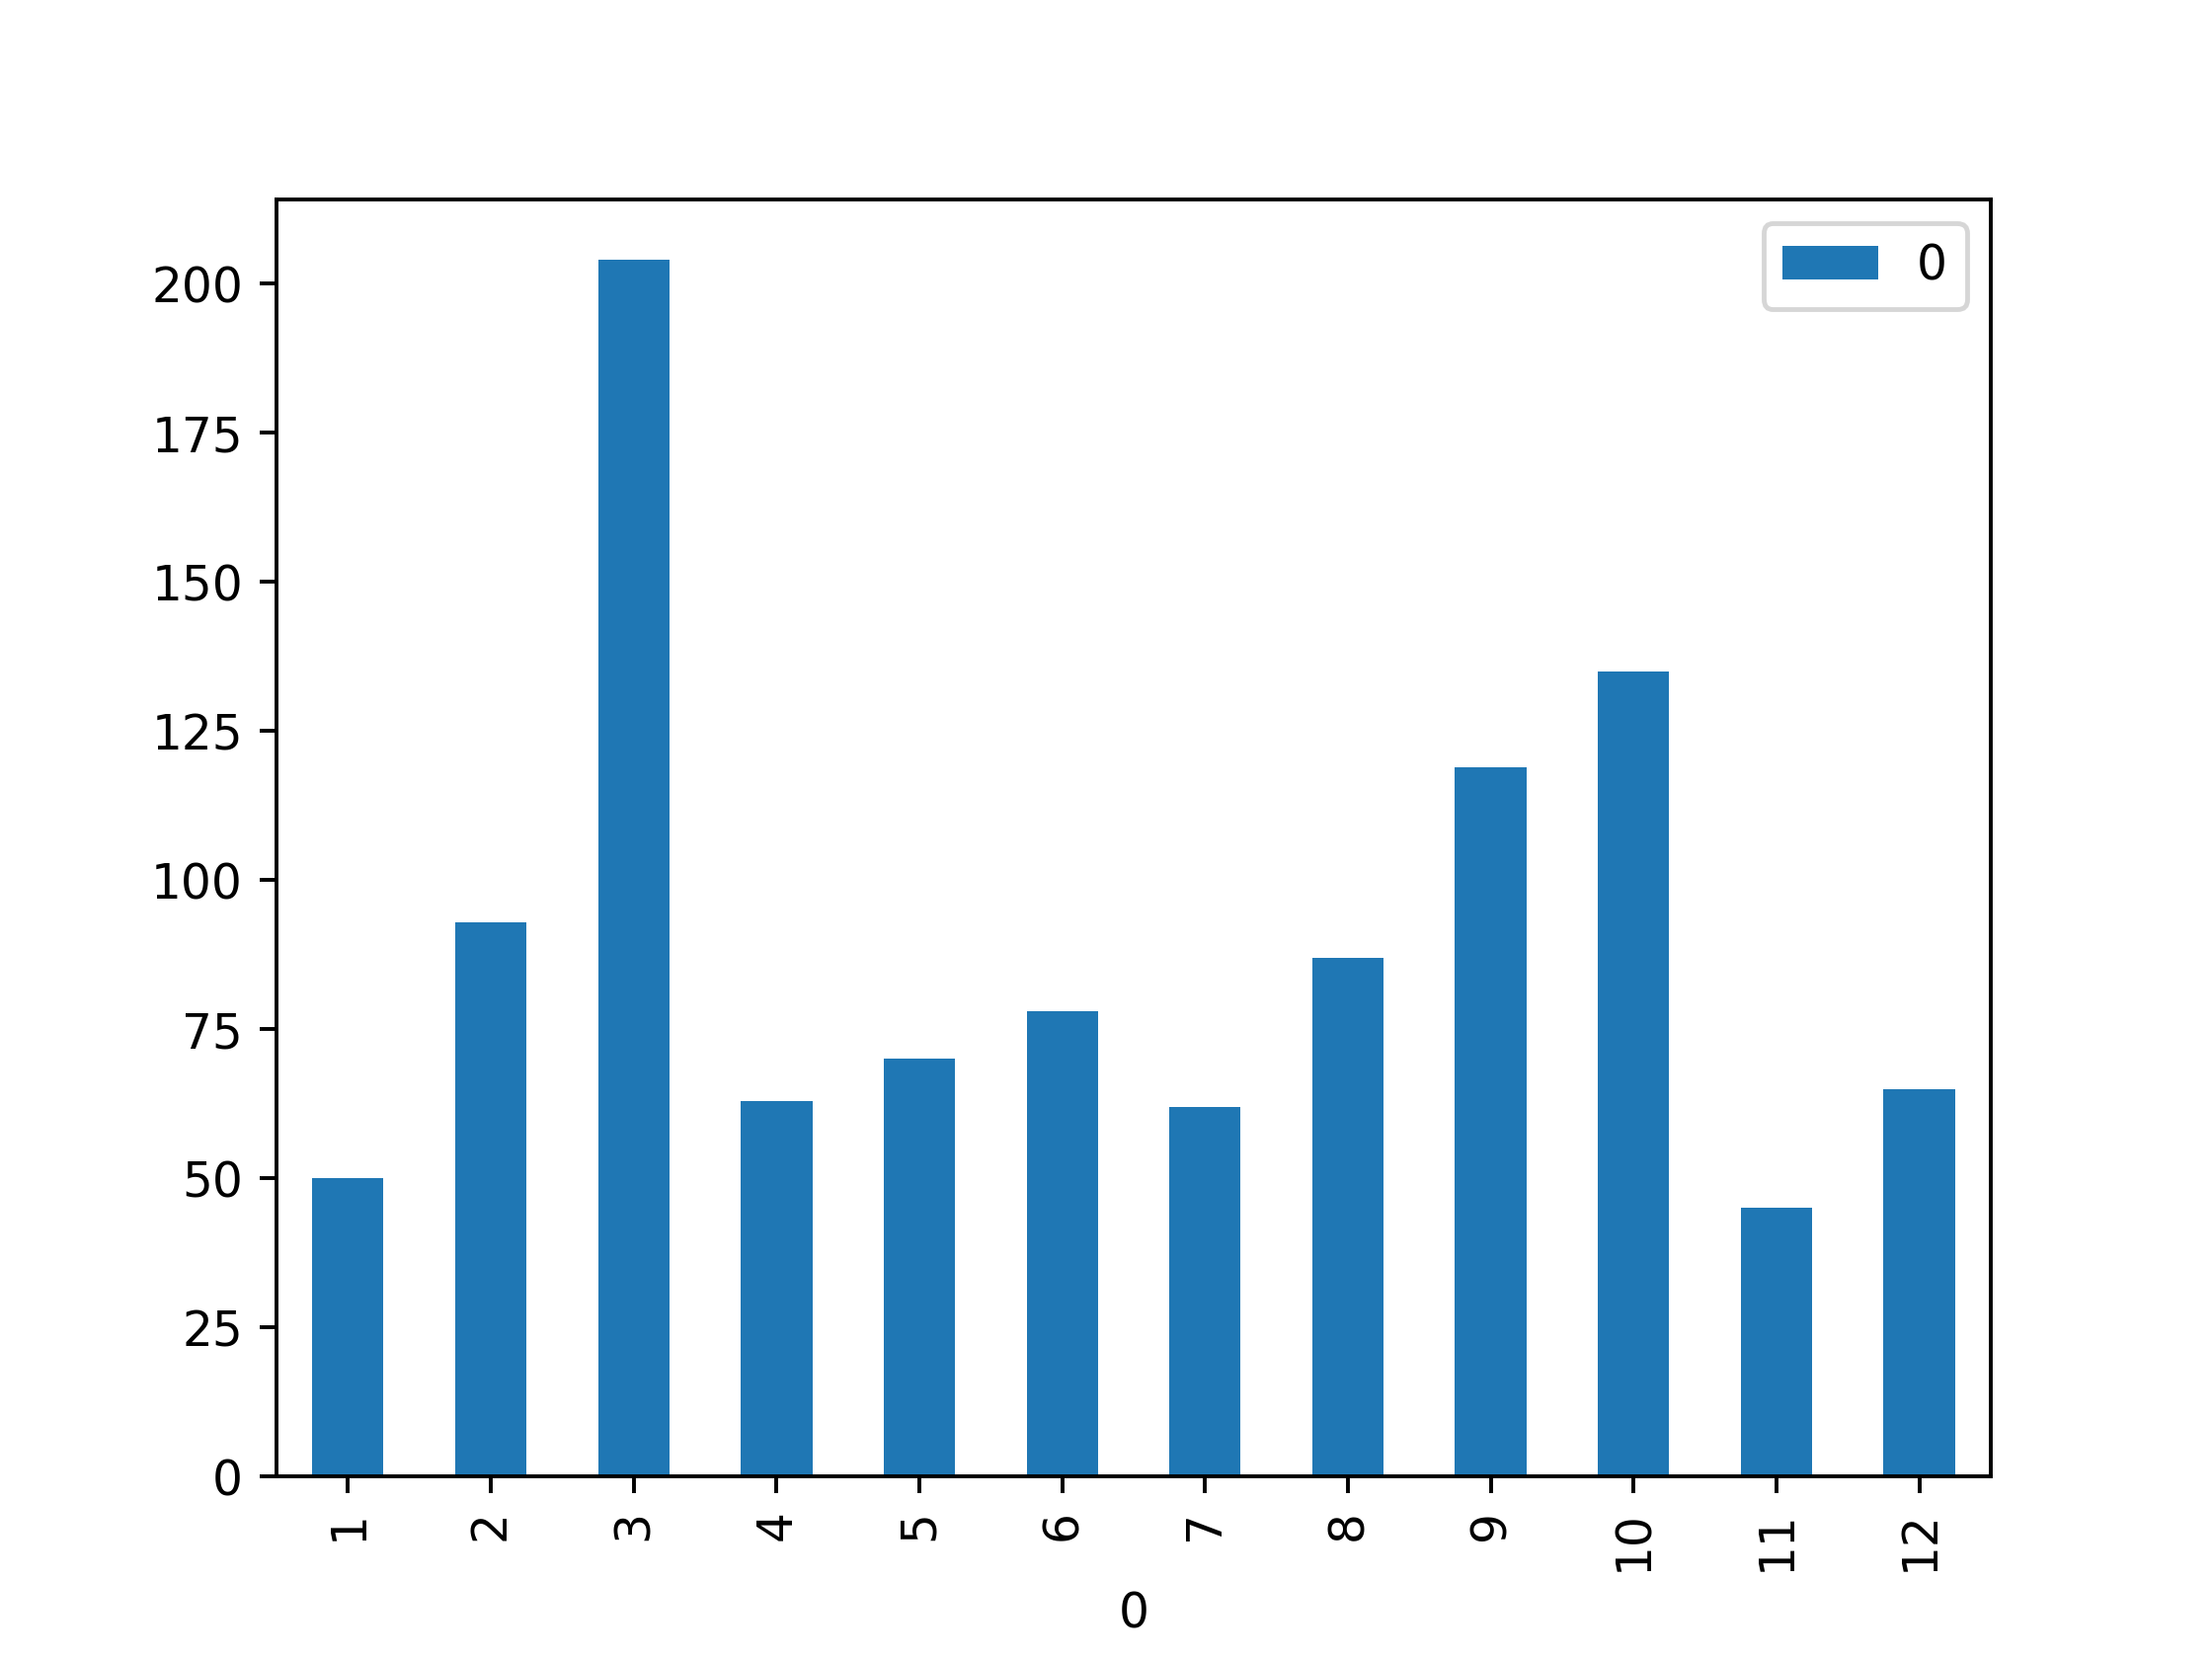

<AxesSubplot:xlabel='0'>

In [124]:
time_df.groupby(time_df[0].dt.month).count().plot(kind="bar")

In [62]:
ase_list.sort()

In [63]:
ase_list

['../../data/climate/ar_detections/ar_2008-03-10-00:00:00-1-UTC_landfall_location.nc',
 '../../data/climate/ar_detections/ar_2008-03-10-01:00:00-1-UTC_landfall_location.nc',
 '../../data/climate/ar_detections/ar_2008-03-28-21:00:00-1-UTC_landfall_location.nc',
 '../../data/climate/ar_detections/ar_2008-03-28-22:00:00-1-UTC_landfall_location.nc',
 '../../data/climate/ar_detections/ar_2008-03-28-23:00:00-1-UTC_landfall_location.nc',
 '../../data/climate/ar_detections/ar_2008-03-29-00:00:00-1-UTC_landfall_location.nc',
 '../../data/climate/ar_detections/ar_2008-03-29-01:00:00-1-UTC_landfall_location.nc',
 '../../data/climate/ar_detections/ar_2008-03-29-02:00:00-1-UTC_landfall_location.nc',
 '../../data/climate/ar_detections/ar_2008-03-29-03:00:00-1-UTC_landfall_location.nc',
 '../../data/climate/ar_detections/ar_2008-03-29-04:00:00-1-UTC_landfall_location.nc',
 '../../data/climate/ar_detections/ar_2008-03-29-05:00:00-1-UTC_landfall_location.nc',
 '../../data/climate/ar_detections/ar_2008-

In [45]:
element=ds.sel(longitude=slice(-150,-90))['magnitude'].values
np.all(element==0)


True

<IPython.core.display.Javascript object>


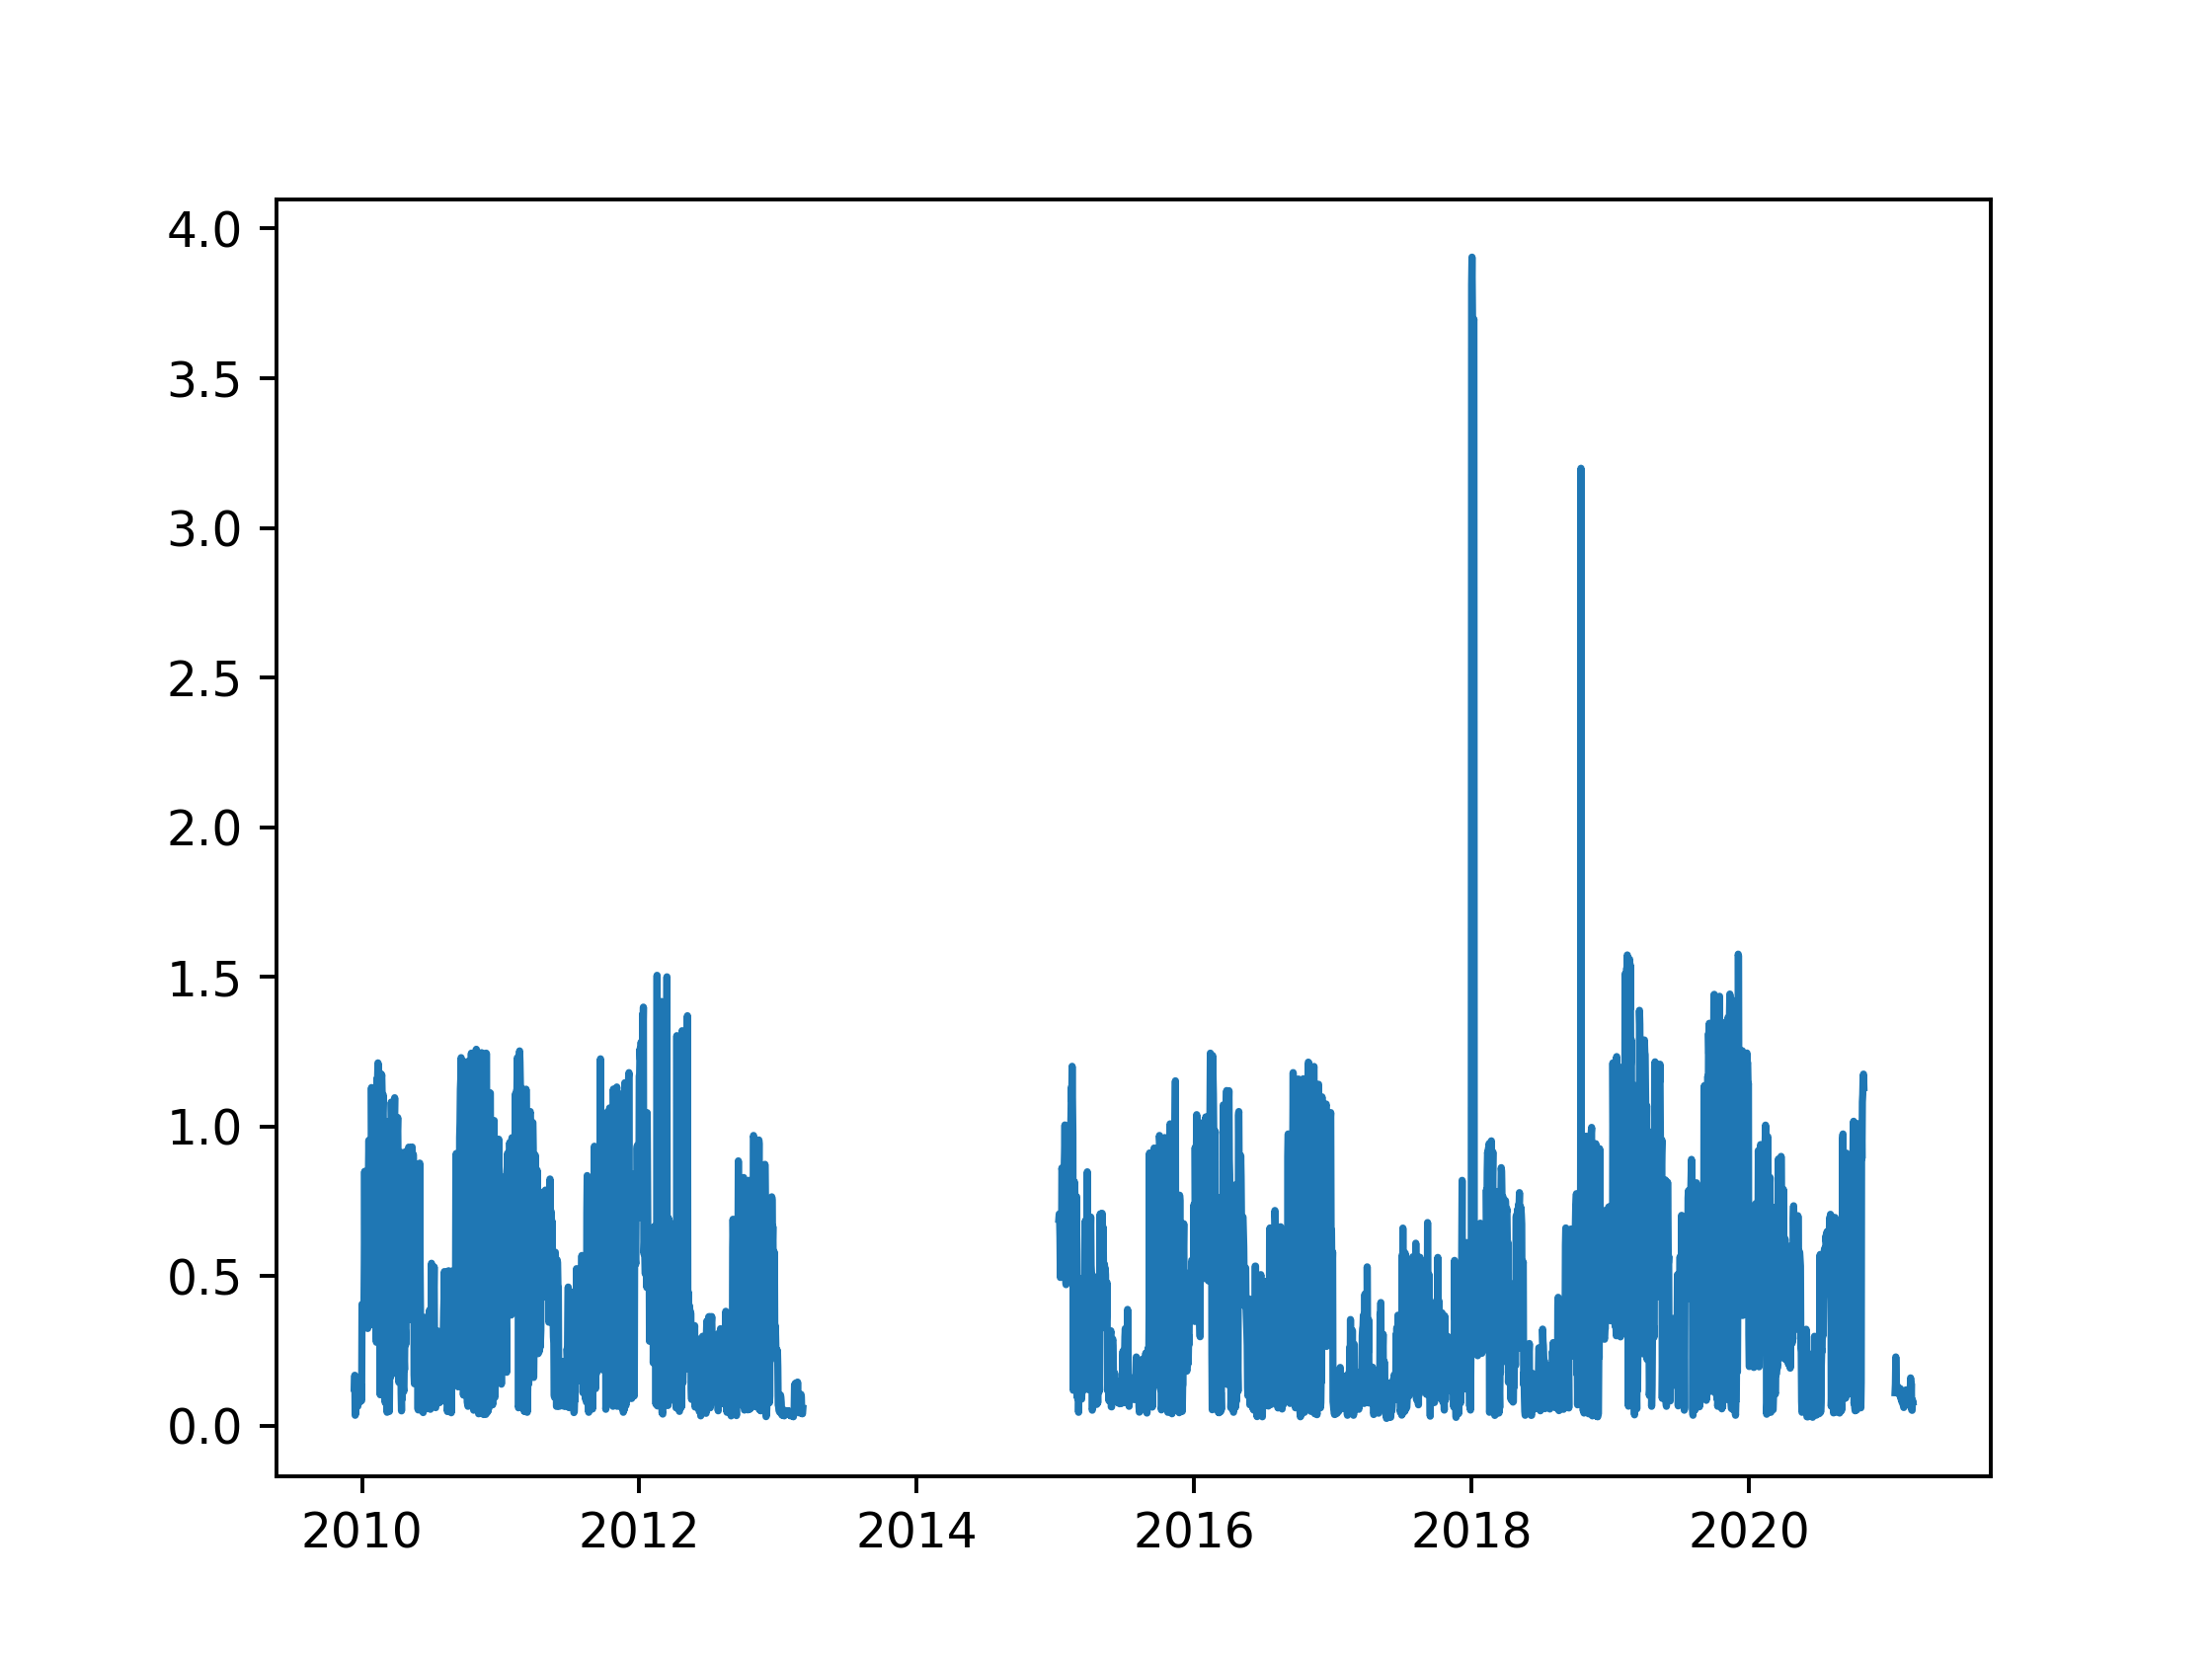

In [5]:
plt.subplots()
plt.plot(lthw_median[])

In [47]:
lthw_season=lthw_median.groupby(['month']).mean()
uthw_season=uthw_median.groupby(['month']).mean()
khlr_season=khlr_median.groupby(['month']).mean()
lthw_season['std']=lthw_median.groupby(['month'])['accumulation'].std()
uthw_season['std']=uthw_median.groupby(['month'])['accumulation'].std()
khlr_season['std']=khlr_median.groupby(['month'])['accumulation'].std()


<IPython.core.display.Javascript object>


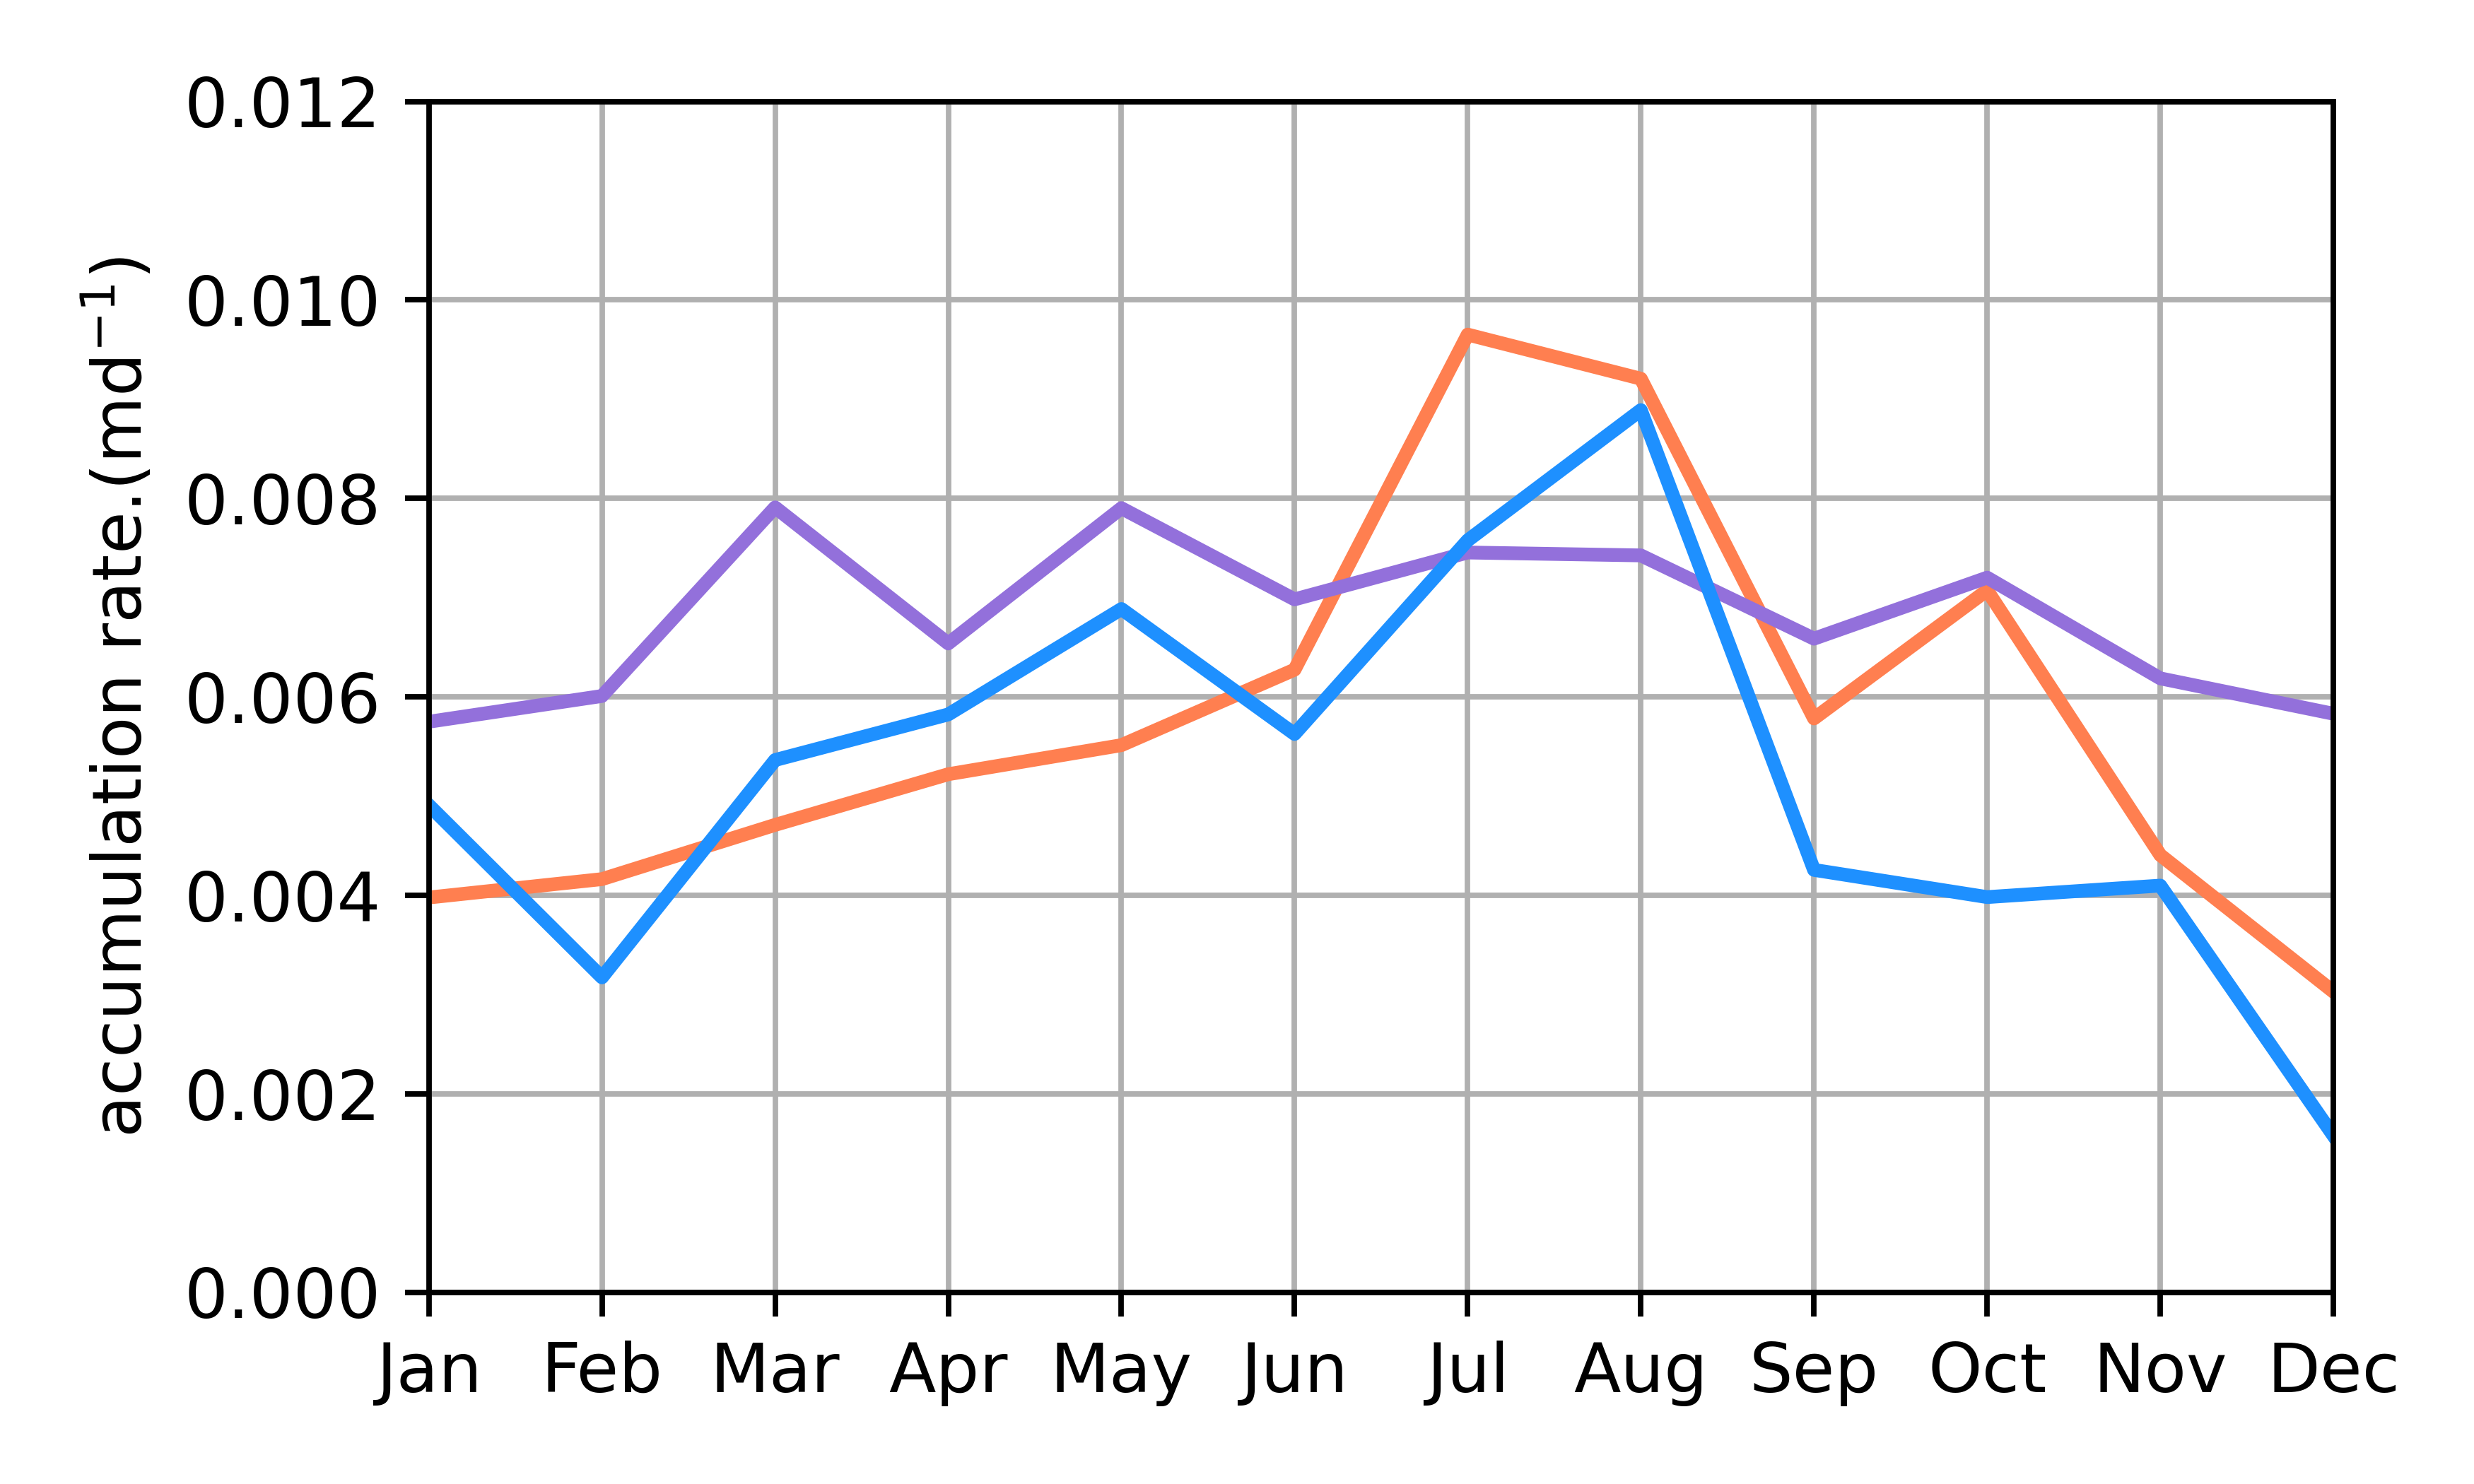

In [83]:
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

fig,ax=plt.subplots(figsize=(5,3),dpi=200)
ax.plot(month,lthw_season['accumulation'],'-',linewidth=2,markersize=2,markeredgewidth=0.0,color='coral',alpha=1)
#ax.fill_between(month,lthw_season['accumulation']-lthw_season['std'],lthw_season['accumulation']+lthw_season['std'],color='mediumpurple',alpha=.2)
ax.plot(month,uthw_season['accumulation'],'-',linewidth=2,markersize=2,markeredgewidth=0.0,color='mediumpurple',alpha=1)
#ax.fill_between(month,uthw_season['accumulation']-uthw_season['std'],uthw_season['accumulation']+uthw_season['std'],color='coral',alpha=.2)
ax.plot(month,khlr_season['accumulation'],'-',linewidth=2,markersize=2,markeredgewidth=0.0,color='dodgerblue',alpha=1)
#ax.fill_between(month,khlr_season['accumulation']-khlr_season['std'],khlr_season['accumulation']+khlr_season['std'],color='dodgerblue',alpha=.2)
ax.set_ylabel(r'accumulation rate.(md$^{-1}$)')
ax.set_ylim(0.0,.012)
ax.set_xlim('Jan','Dec')
plt.tight_layout()
ax.grid()

<IPython.core.display.Javascript object>


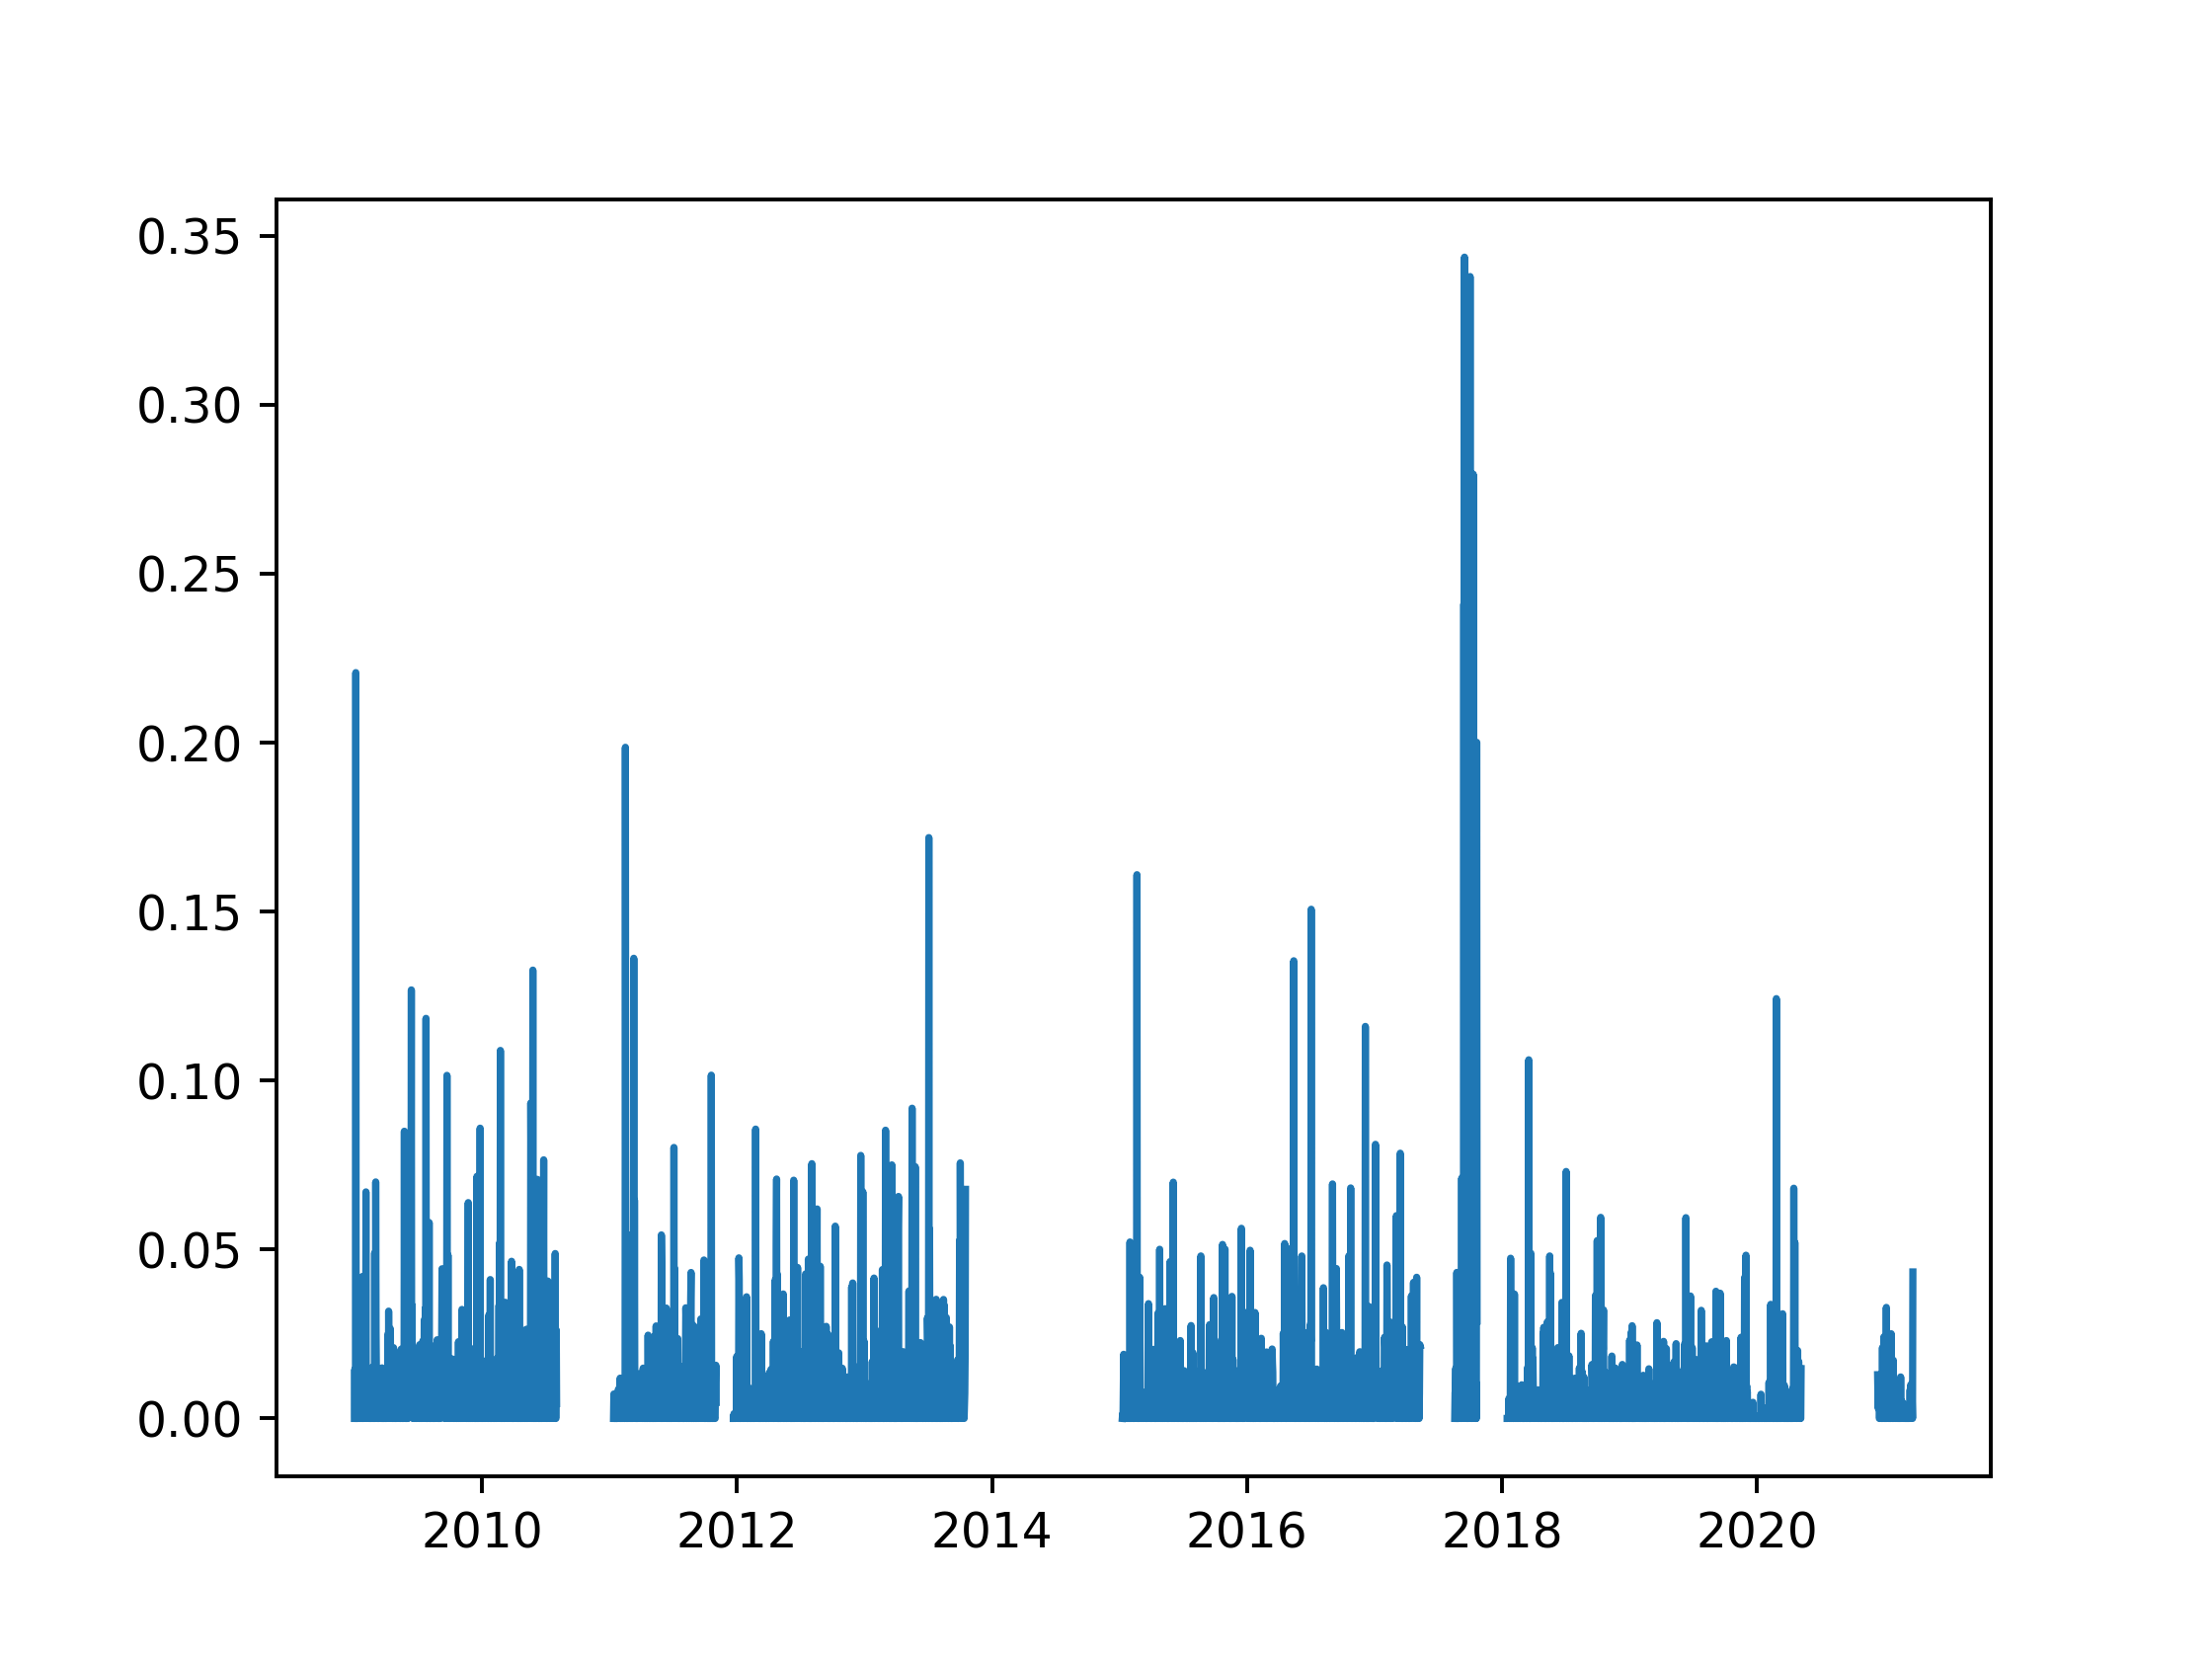

In [18]:
plt.subplots()
plt.plot(uthw_median['accumulation'])

In [11]:
lthw_median

,doy,RH(m),azimuth(deg),freq,satNu,LSP amp,pk2noise,UTC(hr),accumulation
date,,,,,,,,,
2009-12-16,350.0,3.3350,172.00,1.0,17.0,18.410,3.670,13.330,0.005231
2009-12-17,351.0,3.3275,135.35,1.0,13.0,17.090,3.560,14.085,0.000000
2009-12-18,352.0,3.2825,156.00,1.0,17.5,17.720,3.630,12.480,0.033545
2009-12-19,353.0,3.2590,161.20,1.0,17.5,19.115,3.710,12.945,0.030501
2009-12-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005271
...,...,...,...,...,...,...,...,...,...
2020-10-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005948
2020-10-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045010
2020-10-26,300.0,1.2300,151.90,1.0,16.0,15.415,4.995,10.840,0.000000
